# Predicting machine failure

Predicting machine failure through machine learning is paramount for efficient industrial operations. By analysing data patterns, ML models can forecast potential breakdowns, allowing for proactive maintenance and minimising downtime. This predictive approach not only enhances equipment reliability but also optimises resource allocation.

## Scope

**_Context_**

* [The AI4I 2020 Predictive Maintenance Dataset](https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset) is a synthetic dataset that reflects real predictive maintenance data encountered in industry.

* It will be assumed that faulty machinery would lead to decreased productivity and efficiency, quality issues, defective products, and potentially safety concerns for workers.

**_Model_**

* The machine failure consists of five independent failure modes. Consequently, the problem will be approached as multiclass classification.

* No baseline model is available for benchmarking. The model will therefore be compared to a no-skill classifier.

**_Technical requirements_**

* In reality, the model would likely be deployed to an online endpoint so predictions could be generated in real time (via a REST API).

* At this stage, the model will not be deployed. However, the low latency requirements of online deployment does place constraints on infrastructure and model complexity. For this reason, neural networks will not be tested as they can be slow at inference time due to the large number of operations.

**_Data requirements_**

* No further data collection is required.

* No personal data is involved. Consequently there are no apparent legal/ethical constraints (e.g. GDPR).

## Background

**_What is multi-class classification?_**

* A classification task with more than two classes. Each sample can only be labeled as one class.

    Note: Multiclass classification is different to multi-label classification, where multiple labels are to be predicted for each instance.

**_Strategies_**

* Multi-class classification techniques can be categorised into two categories:

    1. **Transformation to binary**

       Strategy: Decompose the problem into multiple binary classification subproblems.
      
    2. **Extension from binary**
 
       Strategy: Extend an existing binary classifier.

### Transformation to binary

**a) OVO: One vs. One**

Set-up:

* Targets form a discrete set

  $y \in \{1, 2,...,K\}$

    *Where $K$ is the number of classes.*

Training:

* A binary classifier is trained for every pair of classes:

    $\text{No. of classifiers}=\frac{k \times (k-1)}{2!}$

* A subset of the training data, containing only the two classes, is used during training.

Prediction:

* All classifiers are used and a voting scheme applied.

* The class with the most votes is chosen as the final prediction:

    $\hat{y}_{final} = \underset{k}{\operatorname{argmax}} \sum_i 1\bigl(h_i(\boldsymbol{x})=k\bigr)$
 
    *Where $h_i(\boldsymbol{x})$ is the output of classifier $i$ and $1\bigl(h_i(\boldsymbol{x})=k\bigr)$ returns $1$ when it returns classification $k$ and $0$ otherwise.*

Example:

* Three classes $\{A, B, C\}$

* The following binary classifiers are trained:

  $\text{Classifier 1} = \text{A vs. B}$

  $\text{Classifier 2} = \text{A vs. C}$
  
  $\text{Classifier 3} = \text{B vs. C}$

Drawbacks:

* Some classes may receive the same number of votes.

  Resolving ties requires choosing the class with the highest total confidence or probability across all classifiers.

* Computationally demanding. It requires $O(k^2)$ classifiers.

  The number of classifiers required is high.

**b) OVR: One vs. Rest**

* Also known as OVA (One vs. All)

Set-up:

* Targets form a discrete set

  $y \in \{1, 2,...,K\}$

    *Where $K$ is the number of classes.*

Training:

* All training data is used.

* A binary classifier is trained for each class against the rest of the classes.

    $\text{No. of classifiers}=K$

    Note: It requires $O(K)$ classifiers. This means OVR is more efficient than OVO.

Prediction:

* All classifiers are utilised.

* The final prediction is the class for which the corresponding classifier reports the highest confidence score:

    $\hat{y}_{final} = \underset{k \in \{1...K\}}{\operatorname{argmax}} h_k(\boldsymbol{x})$
 
    *Where $h_k(\boldsymbol{x})$ is the output of classifier $k$.*

Example:

* Three classes $\{A, B, C\}$

* The following binary classifiers are trained:

  $\text{Classifier 1} = \text{A vs. (B,C)}$

  $\text{Classifier 2} = \text{B vs. (A,C)}$
  
  $\text{Classifier 3} = \text{C vs. (A, B)}$

Drawbacks:

* Aggregation of different classes leads to imbalanced datasets and sometimes suboptimal performance on the minority target class.

### Extension from binary

These strategies extend existing binary classifiers to solve multi-class classification problems.

**a) Naive Bayes**

* The algorithm can naturally handle binary or multiclass classification problems

* Simply choose the classification $k$ that maximises $p(C_k | \boldsymbol{x})$:

    $\hat{y} = \underset{k \in 1...K}{\operatorname{argmax}} p(C_k|\boldsymbol{x})$

    $\hat{y} = \underset{k \in 1...K}{\operatorname{argmax}} p(C_k)\prod_{i=1}^n p(x_i | C_k)$

    *Where $\boldsymbol{x}$ is the vector of $n$ features for a single test instance being classified.*
 
**b) Softmax regression (or multinomial logistic regression)**

* Softmax regression  is a generalisation of logistic regression to a multiclass problem

Logistic regression:

* One weight vector $\theta$ is learnt.

    *Note: Weights are computed using the log-likelihood function*

* The log-odds $z$ (AKA logit) for a single data point $(\boldsymbol{x},y)$ is given by a linear combination of features $x_i$ and weights $\theta_i$:

    $z=\sum_{i=0}^{m}\theta_ix_i = \theta^T\boldsymbol{x}$

    $log\bigl(odds\bigr) = log\bigl(\frac{P(Y = 1|\boldsymbol{X} = \boldsymbol{x})}{1 - P(Y = 1|\boldsymbol{X} = \boldsymbol{x})}\bigr) = \theta^T\boldsymbol{x}$

    *Where, $\theta$ is a vector of parameters of length $m$ and $\boldsymbol{x}$ is a vector of values for each predictor variable (note: $x_0$ is always set to $1$)*.

* $P(Y|X)$ can then be approximated by applying a sigmoid function to the log-odds:

    $\sigma(z)=\frac{1}{1+e^{-z}}$, where $\forall z \in R$, $\sigma(z) \in [0,1]$

    $P(Y = 1|\boldsymbol{X} = \boldsymbol{x}) = \sigma(z)$

    $P(Y = 1|\boldsymbol{X} = \boldsymbol{x}) = \sigma(\theta^T\boldsymbol{x})$

    $P(Y = 1|\boldsymbol{X} = \boldsymbol{x}) = \frac{1}{1+exp(-\theta^T\boldsymbol{x})}$

    *Where, $\sigma(\cdot)$ is the sigmoid function.*

* The decision rule is based on whether the predicted probability is greater than a specified threshold.

    $ \hat{y} = \begin{cases} 
    1 & \text{if } P(Y = 1|\boldsymbol{X} = \boldsymbol{x}) \geq 0.5 \\
    0 & \text{if } P(Y = 1|\boldsymbol{X} = \boldsymbol{x}) < 0.5
    \end{cases}$

Softmax regression:

* One set of weights is learnt for each class $\theta^{(k)}$

    *Note: Weights are computed at the same time using a vector objective function.*

* For a single data point $(\boldsymbol{x},y)$, the logit for each class $z^{(k)}$ is given by a linear combination of features $x_i$ and the relevant weights $\theta^{(k)}$:

    $z^{(k)}=\sum_{i=0}^{m}\theta_i^{(k)}x_i = \theta^{(k)T}\boldsymbol{x}$

    *Where, $\theta$ is a vector of parameters of length $m$ and $\boldsymbol{x}$ is a vector of values for each predictor variable (note: $x_0$ is always set to $1$)*.

* The softmax function is then applied to these raw scores to obtain normalized class probabilities:

    $P(y=k | \boldsymbol{x}; \theta) = \frac{exp\bigl(z^{(k)}\bigr)}{\sum_{j=1}^K exp\bigl(z^{(j)}\bigr)}$

    $P(y=k | \boldsymbol{x}; \theta) = \frac{exp\bigl(\theta^{(k)T}\boldsymbol{x}\bigr)}{\sum_{j=1}^K exp\bigl(\theta^{(j)T}\boldsymbol{x}\bigr)}$
    
* The decision rule is based on selecting the class with the highest predicted probability:

    $\hat{y}_{final} = \underset{k \in \{1...K\}}{\operatorname{argmax}} P(y=k | \boldsymbol{x}; \theta)$

[Source](http://deeplearning.stanford.edu/tutorial/supervised/SoftmaxRegression/)

**c) Random forest**

* The algorithm can naturally handle binary or multiclass classification problems.

* Decicision rules are learnt by repeatedly partitioning training data using predictor values that maximise within partition homogeneity (i.e. class purity) for classification tasks

* The class with the most votes is chosen:

    $\hat{y}_{final} = \underset{k}{\operatorname{argmax}} \sum_i 1\bigl(h_i(\boldsymbol{x})=k\bigr)$
 
    *Where $h_i(\boldsymbol{x})$ is the output of tree $i$ and $1\bigl(h_i(\boldsymbol{x})=k\bigr)$ returns $1$ when it returns classification $k$ and $0$ otherwise.*

**d) XGBoost**

* The idea of boosting methods is to combine several weak learners to form a stronger one.

* In gradient boosting, weak learners are trained sequentially on residuals

Binary setting:

* The final model is a stagewise additive model of $T$ individual trees

* The log-odds $z$ (AKA logit) for a single data point $(\boldsymbol{x},y)$ is given by the sum of the sequence of weak learners:

    $z = H_T(\boldsymbol{x}) = \sum_{t=1}^T h_t(\boldsymbol{x})$

  *Where $H_T$ is the ensemble and $T$ is number of consitutent learners*

* The logit is transformed into a probability using a sigmoid function.

    $P(Y = 1|\boldsymbol{X} = \boldsymbol{x}) = \frac{1}{1+exp(-z)}$

    *Where, $\sigma(\cdot)$ is the sigmoid function.*

* The decision rule is based on whether the predicted probability is greater than a specified threshold.

    $ \hat{y} = \begin{cases} 
    1 & \text{if } P(Y = 1|\boldsymbol{X} = \boldsymbol{x}) \geq 0.5 \\
    0 & \text{if } P(Y = 1|\boldsymbol{X} = \boldsymbol{x}) < 0.5
    \end{cases}$

Multiclass setting:

* Distinct weak learners are trained for each class

    *Note: In reality, these are computed at the same time using a vector objective function.*

* The predictions from all class-specific trees are aggregated to form a final score for each class.

    $z^{(k)} = H_T^{(k)}(\boldsymbol{x}) = \sum_{t=1}^T h_t^{(k)}(\boldsymbol{x})$

  *Where $H_T^{(k)}$ is the ensemble for class $k$ and $T$ is number of consitutent learners*

* The softmax function is then applied to these raw scores to obtain normalized class probabilities:

    $P(y=k | \boldsymbol{x}; \theta) = \frac{exp\bigl(z^{(k)}\bigr)}{\sum_{j=1}^K exp\bigl(z^{(j)}\bigr)}$
  
* The decision rule is based on selecting the class with the highest predicted probability:

    $\hat{y}_{final} = \underset{k \in \{1...K\}}{\operatorname{argmax}} P(y=k | \boldsymbol{x}; \theta)$

[Source](https://stats.stackexchange.com/questions/204154/classification-with-gradient-boosting-how-to-keep-the-prediction-in-0-1)

[Source](https://bradleyboehmke.github.io/HOML/gbm.html#feature-interpretation-1)

## Strategy

### Model types

* An "extension from binary" strategy will be used.

* This will prevent loss of information about the multiclass relationships and reduce model complexity (i.e. one-vs-one would result in a large number of binary classifiers.)

* A Random Forest will be tested as this type of model performed the best for the binary classification problem.
  
    - Random Forest (discriminative probabilistic model & non-linear classifier)

### Performance metrics

**Background**

* In the context of a multiclass problem, micro and macro averaging are commonly used to summarise performance across multiple classes.

* Micro-averaging considers all instances equally and is therefore more influenced by the performance on larger classes.

    $Micro-Recall = \frac{\sum_{i=1}^KTP_i}{\sum_{i=1}^K\bigl(TP_i + FN_i\bigr)}$

    $Micro-Precision = \frac{\sum_{i=1}^KTP_i}{\sum_{i=1}^K\bigl(TP_i + FP_i\bigr)}$

    $Micro-F1 = \frac{2 \times micro-recall \times micro-precision}{micro-recall + micro-precision}$

    *Where $K$ is the number of classes.*

* Whilst macro-averaging treats all classes equally and therefore gives a more balanced view of performance across all classes.

    $Macro-Recall = \frac{1}{K}\sum_{i=1}^K\frac{TP_i}{TP_i + FN_i}$

    $Macro-Precision = \frac{1}{K}\sum_{i=1}^K\frac{TP_i}{TP_i + FP_i}$

    $Macro-F1 = \frac{2}{K}\sum_{i=1}^K\frac{micro-recall_i \times micro-precision_i}{micro-recall_i + micro-precision_i}$

    *Where $K$ is the number of classes.*

**Strategy**

* The performance metrics should align closely with the specific business problem at hand.

* While a single metric simplifies ranking model performance, the dataset's imbalance makes overall accuracy unsuitable.

* It is assumed the cost of a false negative prediction (incorrectly identifying something as okay when it has failed) outweighs the cost of a false positive prediction.

* The primary metric is therefore macro-recall across the failure classes, reflecting the model's ability to identify failed machinery and aiming to minimise false negatives.

* A secondary metric is macro-precision across the failure classes, thereby minimising false positives and ensuring high accuracy in failed predictions. The optimisation target is a nominal constraint of 50% precision.

* Striking a balance involves achieving a reasonable level of precision to prevent unnecessary disruptions while maintaining a sufficiently high recall for effective fault detection. With this in mind, Macro-F1 score will be used during optimisation.

    Note: AUC on the Precision-Recall for each class would allow for the comparison of different models in terms of their ability to balance precision and recall. However, this reduces the problem to an OVA strategy.

## Import dependencies

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

import sys
sys.path.insert(0, "C:\\Users\\billy\\OneDrive\\Documents\\Python Scripts\\1. Portfolio\\machine-failure\\machine-failure")
import custom_funcs as cf

from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
import collections

## Import raw data

* **UID:** Unique identifier ranging from 1 to 10000

* **productID:** Consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number

* **air temperature [K]:** Generated using a random walk process later normalized to a standard deviation of 2 K around 300 K

* **process temperature [K]:** Generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

* **rotational speed [rpm]:** Calculated from powepower of 2860 W, overlaid with a normally distributed noise

* **torque [Nm]:** Torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.

* **tool wear [min]:** The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

* **Target:** Failure or Not

* **Failure Type:** Type of Failure

In [2]:
raw_df = pd.read_csv(cf.file_directory("raw") + "predictive_maintenance.csv")
raw_df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


## Import cleaned data

In [3]:
train_df = pd.read_csv(cf.file_directory('cleaned') + 'train_df.csv')
test_df = pd.read_csv(cf.file_directory('cleaned') + 'test_df.csv')
train_df.head()

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,Target,Failure Type_Heat,Failure Type_None,Failure Type_Overstrain,Failure Type_Power,Failure Type_Random,Failure Type_Tool
0,310.7,1454,39.4,17,0,0,1,0,0,1,0,0,0,0
1,309.7,1868,23.8,118,0,0,1,0,0,1,0,0,0,0
2,308.5,1616,30.2,34,0,1,0,0,0,1,0,0,0,0
3,312.6,1768,23.9,149,0,0,1,0,0,1,0,0,0,0
4,313.4,1624,32.1,53,0,0,1,0,0,1,0,0,0,0


## Train/test prep

In [4]:
# Predictors
cols = ['Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]', 'Type_H', 'Type_L', 'Type_M']
X_train = train_df[cols]
X_test = test_df[cols]
X_train.head()

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,310.7,1454,39.4,17,0,0,1
1,309.7,1868,23.8,118,0,0,1
2,308.5,1616,30.2,34,0,1,0
3,312.6,1768,23.9,149,0,0,1
4,313.4,1624,32.1,53,0,0,1


In [5]:
# Target
y_train = train_df.filter(regex=("Failure Type.*"))
y_test = test_df.filter(regex=("Failure Type.*"))

# Reverse one hot encoding
y_train = y_train.idxmax(axis=1)
y_test = y_test.idxmax(axis=1)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the reversed target variable
y_train = pd.Series(label_encoder.fit_transform(y_train))
y_test = pd.Series(label_encoder.fit_transform(y_test))

# Label mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Failure Type_Heat': 0, 'Failure Type_None': 1, 'Failure Type_Overstrain': 2, 'Failure Type_Power': 3, 'Failure Type_Random': 4, 'Failure Type_Tool': 5}


## Model training

### Random forest

**Hyperparameter selection**

* The following hyperparameters are optimised:
       
    1. The number of estimators.
       
    2. The maximum depth of the trees.
       
        Note: If None, then nodes are expanded until all leaves are pure or until all leaves contain less than *min_samples_split* samples.

    3. The minimum number of samples required to split an internal node is optimised.

In [6]:
# Create a pipeline with a scaler and classifier
num_cols = ['Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
preprocessor = ColumnTransformer(transformers=[('scaler', MinMaxScaler(), num_cols)], remainder='passthrough')
pipe = Pipeline([('preprocessor', preprocessor), ('rf', RandomForestClassifier())])

# Define hyperparameters to tune
param_grid = {
    'rf__n_estimators': [100],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
}

# Use StratifiedKFold for cross-validation to maintain class balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a custom scoring function for macro F1 score with subset of classes
# Note: zero_division=0 means that if there are no predicted samples for a class, the precision, recall, or F1 score for that class will be set to 0
subset_classes = [0, 2, 3, 4, 5] 
macro_f1_subset = make_scorer(f1_score, average='macro', labels=subset_classes,zero_division=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=cv, scoring=macro_f1_subset)
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_pipeline = grid_search.best_estimator_
print("Best n_estimators:", grid_search.best_params_['rf__n_estimators'])
print("Best max_depth:", grid_search.best_params_['rf__max_depth'])
print("Best min_samples_split:", grid_search.best_params_['rf__min_samples_split'])

Best n_estimators: 100
Best max_depth: None
Best min_samples_split: 5


**Performance**

* K-fold cross validation is used to assess the performance of the optimal configuration.

* A stratified split is used to maintain the class balance.

**_Key observations_**

* Recall is $TBC$. This means the model identifies $TBC\%$ of all failed machinery.

    $Recall = \frac{TP}{TP+FN}$

* Precision is $TBC$. This means roughly $TBC\%$ of failed predictions are correct.

    $Precision = \frac{TP}{TP+FP}$

In [10]:
best_params = {key.lstrip('rf__'):value for key, value in grid_search.best_params_.items()}

# Use StratifiedKFold for cross-validation to maintain class balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create custom macro scoring functions
# Note: zero_division=0 means that if there are no predicted samples for a class, the precision, recall, or F1 score for that class will be set to 0
macro_f1_subset = make_scorer(f1_score, average='macro', labels=subset_classes, zero_division=0)
macro_precision_subset = make_scorer(precision_score, average='macro', labels=subset_classes, zero_division=0)
macro_recall_subset = make_scorer(recall_score, average='macro', labels=subset_classes, zero_division=0)

# Iterate over k-folds
macro_precision, macro_recall, macro_f1 = [], [], []
for train_index, test_index in cv.split(X_train, y_train):
    X_train_k, y_train_k = X_train.loc[train_index], y_train.loc[train_index]
    X_test_k, y_test_k = X_train.loc[test_index], y_train.loc[test_index]

    # Create a pipeline with a classifier and a scaler
    num_cols = ['Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
    preprocessor = ColumnTransformer(transformers=[('scaler', MinMaxScaler(), num_cols)], remainder='passthrough')
    pipe = Pipeline([('preprocessor', preprocessor), ('rf', RandomForestClassifier(**best_params))])

    # Perform predictions
    pipe.fit(X_train_k, y_train_k)
    
    # Calculate precision, recall & f1-score
    precision_k = macro_precision_subset(pipe, X_test_k, y_test_k)
    recall_k = macro_recall_subset(pipe, X_test_k, y_test_k)
    f1_k = macro_f1_subset(pipe, X_test_k, y_test_k)

    macro_precision.append(precision_k)
    macro_recall.append(recall_k)
    macro_f1.append(f1_k)

print(f"Macro-Precision: {np.mean(macro_precision)}")
print(f"Macro-Recall: {np.mean(macro_recall)}")
print(f"Macro-F1: {np.sqrt(np.mean(macro_f1))}")

Macro-Precision: 0.32620357420357415
Macro-Recall: 0.24556288156288159
Macro-F1: 0.523242087838059


### Random Forest with SMOTE

**Hyperparameter selection**

* The following hyperparameters are optimised:
       
    1. The number of estimators.
       
    2. The maximum depth of the trees.
       
        Note: If None, then nodes are expanded until all leaves are pure or until all leaves contain less than *min_samples_split* samples.

    3. The minimum number of samples required to split an internal node is optimised.
 
    4. The SMOTE sampling strategy.

In [14]:
# Test smote resampling
print(f"Original dataset shape: {collections.Counter(y_train)}")
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print(f"Resampled: {collections.Counter(y_res)}")

Original dataset shape: Counter({1: 6456, 0: 80, 3: 69, 2: 49, 5: 33, 4: 13})
Resampled: Counter({1: 6456, 3: 6456, 0: 6456, 2: 6456, 4: 6456, 5: 6456})


In [16]:
# Create a pipeline with a scaler, SMOTE and classifier
num_cols = ['Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
preprocessor = ColumnTransformer(transformers=[('scaler', MinMaxScaler(), num_cols)], remainder='passthrough')
pipe = make_pipeline(preprocessor, SMOTE(random_state=42), RandomForestClassifier())

# Define hyperparameters to tune
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 150],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [20, 30, 40],
}

# Use StratifiedKFold for cross-validation to maintain class balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a custom scoring function for macro F1 score with subset of classes
# Note: zero_division=0 means that if there are no predicted samples for a class, the precision, recall, or F1 score for that class will be set to 0
subset_classes = [0, 2, 3, 4, 5] 
macro_f1_subset = make_scorer(f1_score, average='macro', labels=subset_classes, zero_division=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=cv, scoring=macro_f1_subset)
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_pipeline = grid_search.best_estimator_

# Print the best parameters
print("Best n_estimators:", grid_search.best_params_['randomforestclassifier__n_estimators'])
print("Best max_depth:", grid_search.best_params_['randomforestclassifier__max_depth'])
print("Best min_samples_split:", grid_search.best_params_['randomforestclassifier__min_samples_split'])

Best n_estimators: 50
Best max_depth: None
Best min_samples_split: 30


**Performance**

* K-fold cross validation is used to assess the performance of the optimal configuration.

* A stratified split is used to maintain the class balance.

**_Key observations_**

* Recall is $TBC$. This means the model identifies $TBC\%$ of all failed machinery.

    $Recall = \frac{TP}{TP+FN}$

* Precision is $TBC$. This means roughly $TBC\%$ of failed predictions are correct.

    $Precision = \frac{TP}{TP+FP}$

In [18]:
rf_best_params = {key:value for key, value in grid_search.best_params_.items() if 'randomforestclassifier__' in key}
rf_best_params = {key.replace('randomforestclassifier__',''):value for key, value in rf_best_params.items()}

# Use StratifiedKFold for cross-validation to maintain class balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create custom macro scoring functions
# Note: zero_division=0 means that if there are no predicted samples for a class, the precision, recall, or F1 score for that class will be set to 0
macro_f1_subset = make_scorer(f1_score, average='macro', labels=subset_classes, zero_division=0)
macro_precision_subset = make_scorer(precision_score, average='macro', labels=subset_classes, zero_division=0)
macro_recall_subset = make_scorer(recall_score, average='macro', labels=subset_classes, zero_division=0)

# Iterate over k-folds
macro_precision, macro_recall, macro_f1 = [], [], []
for train_index, test_index in cv.split(X_train, y_train):
    X_train_k, y_train_k = X_train.loc[train_index], y_train.loc[train_index]
    X_test_k, y_test_k = X_train.loc[test_index], y_train.loc[test_index]

    # Convert y_train_k and y_test_k to NumPy arrays
    y_train_k_np = np.array(y_train_k)
    y_test_k_np = np.array(y_test_k)

    # Create a pipeline with a classifier and a scaler
    num_cols = ['Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
    preprocessor = ColumnTransformer(transformers=[('scaler', MinMaxScaler(), num_cols)], remainder='passthrough')
    pipe = make_pipeline(preprocessor, SMOTE(random_state=42), RandomForestClassifier(**rf_best_params))

    # Perform predictions
    pipe.fit(X_train_k, y_train_k_np)
    
    # Calculate precision, recall & f1-score
    precision_k = macro_precision_subset(pipe, X_test_k, y_test_k_np)
    recall_k = macro_recall_subset(pipe, X_test_k, y_test_k_np)
    f1_k = macro_f1_subset(pipe, X_test_k, y_test_k_np)

    macro_precision.append(precision_k)
    macro_recall.append(recall_k)
    macro_f1.append(f1_k)

print(f"Macro-Precision: {np.mean(macro_precision)}")
print(f"Macro-Recall: {np.mean(macro_recall)}")
print(f"Macro-F1: {np.sqrt(np.mean(macro_f1))}")

Macro-Precision: 0.31273786301949497
Macro-Recall: 0.5214706959706958
Macro-F1: 0.6043221809006565


## Model evaluation

| Model | Macro-Recall | Macro-Precision | Macro-F1 |
|----------|----------|----------|----------|
| Random Forest   | 0.25   | 0.33   | 0.52   |
| Random Forest with SMOTE   | 0.52   | 0.31   | 0.6   |

In [19]:
# Retrain with entire training set
num_cols = ['Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
preprocessor = ColumnTransformer(transformers=[('scaler', MinMaxScaler(), num_cols)], remainder='passthrough')
pipe = make_pipeline(preprocessor, SMOTE(random_state=42), RandomForestClassifier(**rf_best_params))
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]'])])),
                ('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_split=30,
                                        n_estimators=50))])

Label Mapping: {'Failure Type_Heat': 0, 'Failure Type_None': 1, 'Failure Type_Overstrain': 2, 'Failure Type_Power': 3, 'Failure Type_Random': 4, 'Failure Type_Tool': 5}
              precision    recall  f1-score   support

           0       0.16      0.59      0.25        32
           1       0.99      0.91      0.95      3196
           2       0.62      0.72      0.67        29
           3       0.58      0.81      0.68        26
           4       0.00      0.00      0.00         5
           5       0.04      0.25      0.07        12

    accuracy                           0.90      3300
   macro avg       0.40      0.55      0.43      3300
weighted avg       0.97      0.90      0.93      3300



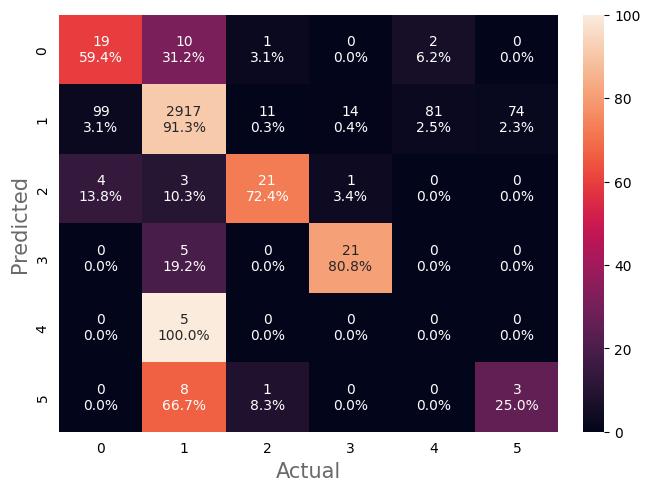

In [21]:
# Evaluate with test set

# Predict
y_pred = pipe.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
# Source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
confusion_matrices_count = confusion_matrix(y_test, y_pred)
confusion_matrices_perc = confusion_matrix(y_test, y_pred, normalize='true')*100

# Plot confusion matrix
confusion_matrices_perc  = confusion_matrices_perc .round(1)
labels = [f"{c}\n{p}%" for c, p in zip(confusion_matrices_count.flatten(), confusion_matrices_perc.flatten())]
labels = np.asarray(labels).reshape(6, 6)

fig, axes = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(6.4, 4.8))
axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')

sns.heatmap(confusion_matrices_perc, ax=axes, annot=labels, fmt="s", annot_kws={"fontsize":10})
axes.set_xlabel('Actual',fontsize=15, color='dimgray')
axes.set_ylabel('Predicted',fontsize=15, color='dimgray');

In [22]:
print("Label Mapping:", label_mapping)

Label Mapping: {'Failure Type_Heat': 0, 'Failure Type_None': 1, 'Failure Type_Overstrain': 2, 'Failure Type_Power': 3, 'Failure Type_Random': 4, 'Failure Type_Tool': 5}


### Conclusion